In [1]:
import re
import requests
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
import os
from sklearn.linear_model import BayesianRidge, LinearRegression,RidgeCV

In [2]:
%pylab inline
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
year = 2012
url = "https://www.sports-reference.com/cbb/seasons/"+str(year)+".html"
r = requests.get(url)

In [4]:
rawtext = r.text.split("\n")
AllConf = []
for l in rawtext:
    m = re.search("(cbb/conferences/[a-zA-Z0-9-_]+/"+str(year)+".html).*sos\" \>(-*\d+\.\d+)</td><td class.*poll_final\" >(\d+)",l)
    if m:
        conf = m.group(1)
        sos = float(m.group(2))
        app = int(m.group(3))
        if (sos < -2.0) & (app == 0):
            continue
        print(conf,sos,app)
        if conf not in AllConf:
            AllConf.append(conf)
            #print(conf)


cbb/conferences/big-ten/2012.html 8.18 5
cbb/conferences/big-12/2012.html 7.49 3
cbb/conferences/big-east/2012.html 6.81 4
cbb/conferences/sec/2012.html 6.24 3
cbb/conferences/acc/2012.html 5.76 3
cbb/conferences/mwc/2012.html 3.36 3
cbb/conferences/pac-12/2012.html 4.83 0
cbb/conferences/atlantic-10/2012.html 3.59 0
cbb/conferences/mvc/2012.html 3.48 2
cbb/conferences/cusa/2012.html 2.48 0
cbb/conferences/wcc/2012.html 1.33 1
cbb/conferences/wac/2012.html -0.4 0
cbb/conferences/colonial/2012.html -0.86 0
cbb/conferences/horizon/2012.html -0.21 0
cbb/conferences/mac/2012.html -0.91 0
cbb/conferences/sun-belt/2012.html -0.88 0
cbb/conferences/atlantic-sun/2012.html -1.03 0
cbb/conferences/summit/2012.html -1.94 0
cbb/conferences/ovc/2012.html -4.05 1


In [5]:
#Get all team


AllTeam = dict()
for conf in AllConf:
    url = "https://www.sports-reference.com/"+conf
    r = requests.get(url)
    rawtext = r.text.split("\n")
    for l in rawtext:
        #https://www.sports-reference.com/cbb/schools/kansas/2017.html
        m = re.search("(\/cbb\/schools\/[a-zA-Z0-9-_]+\/"+str(year)+"\.html)",l)
        if m != None:
            turl = str(m.group(1))
            team = str(re.search("schools\/([a-zA-Z0-9-_]+)",turl).group(1))
            if team in AllTeam:
                if turl != AllTeam[team]:
                    print("Warning different stuff",turl,AllTeam[team])
            AllTeam[team] = turl
        

In [57]:
#Get Game
AllGameUrl = []

for team in sorted(AllTeam):
    #if not re.search("kentuc",team):
    #    continue
   #print(team,"https://www.sports-reference.com/"+team+"/"+str(year)+"-schedule.html")
    
    r = requests.get("https://www.sports-reference.com/"+AllTeam[team])
    rawtext = r.text.split("\n")
    for l in rawtext:
        m = re.search("(cbb\/boxscores\/(.*)\.html).*height",l)
        if m != None:
            #print(m.group(1))
            turl = "https://www.sports-reference.com/"+str(m.group(1))
            if turl not in AllGameUrl:
                AllGameUrl.append(turl)


air-force https://www.sports-reference.com/air-force/2012-schedule.html
akron https://www.sports-reference.com/akron/2012-schedule.html
alabama https://www.sports-reference.com/alabama/2012-schedule.html
alabama-birmingham https://www.sports-reference.com/alabama-birmingham/2012-schedule.html
arizona https://www.sports-reference.com/arizona/2012-schedule.html
arizona-state https://www.sports-reference.com/arizona-state/2012-schedule.html
arkansas https://www.sports-reference.com/arkansas/2012-schedule.html
arkansas-little-rock https://www.sports-reference.com/arkansas-little-rock/2012-schedule.html
arkansas-state https://www.sports-reference.com/arkansas-state/2012-schedule.html
auburn https://www.sports-reference.com/auburn/2012-schedule.html
austin-peay https://www.sports-reference.com/austin-peay/2012-schedule.html
ball-state https://www.sports-reference.com/ball-state/2012-schedule.html
baylor https://www.sports-reference.com/baylor/2012-schedule.html
belmont https://www.sports-ref

missouri-state https://www.sports-reference.com/missouri-state/2012-schedule.html
morehead-state https://www.sports-reference.com/morehead-state/2012-schedule.html
murray-state https://www.sports-reference.com/murray-state/2012-schedule.html
nebraska https://www.sports-reference.com/nebraska/2012-schedule.html
nevada https://www.sports-reference.com/nevada/2012-schedule.html
nevada-las-vegas https://www.sports-reference.com/nevada-las-vegas/2012-schedule.html
new-mexico https://www.sports-reference.com/new-mexico/2012-schedule.html
new-mexico-state https://www.sports-reference.com/new-mexico-state/2012-schedule.html
north-carolina https://www.sports-reference.com/north-carolina/2012-schedule.html
north-carolina-state https://www.sports-reference.com/north-carolina-state/2012-schedule.html
north-carolina-wilmington https://www.sports-reference.com/north-carolina-wilmington/2012-schedule.html
north-dakota-state https://www.sports-reference.com/north-dakota-state/2012-schedule.html
north-

In [7]:
#https://www.sports-reference.com/cbb/schools/baylor/2010-schedule.html

In [ ]:
AllGame = dict()

In [160]:
path = "/media/vince/datascience/ncaa/"


print(len(AllGameUrl))
AllGameUrl = sorted(AllGameUrl)
for i in range(0,len(AllGameUrl)):
    
    if i / 100.0 == int(i /100):
        print(i,len(AllGameUrl))
    turl = AllGameUrl[i]
    #if not re.search("kentucky",turl):
    #    continue
    m = re.search("\/(\d+-\d+-\d+.*).html$",turl)
    GameId = m.group(1)
    
    fname = path+"/raw/"+str(year)+"/"+GameId+".dat"
    if not os.path.isfile(fname):
        print(turl)
        r = requests.get(turl)
        rawtext = r.text.encode('utf-8').split("\n")
        f = open(fname,"w")
        for l in rawtext:
            #print(l)
            f.write(l+"\n")
        f.close()
    lines = [line.rstrip('\n') for line in open(fname)]
    nteam = "home"
    
    AllGame[GameId] = dict()
    for l in lines:
        #Get player MP
        #m = re.search("cbb/players/(.*).html.*data-stat=\"mp\" csk=\"\d+\" >(\d+)</td>",l)
        #a href="/cbb/players/tony-easley-1.html">Tony Easley</a></th><td class="right " data-stat="mp" >13</td>
        m = re.search("cbb/players/(.*).html.*data-stat=\"mp\" >(\d+)</td>",l)
        if m != None:
            #print(l)
            #print(m.group(1),m.group(2))
            mp = float(m.group(2))
            #print(nteam,mp,str(m.group(1)))
            AllGame[GameId][nteam+"_player_mp_"+str(m.group(1))] = mp
            AllGame[GameId][nteam+"_player_mp_team"] = 40.0
            #die
        # Get Player advance stat
        
        m = re.search("cbb/players/(.*).html.*orb\" >(\d+)\<.*drb\"\s*\>(\d+)",l)
        if m != None:
            continue
            #print(l)
            #print(m.group(1),m.group(2),m.group(3))
            #die
            orb = float(m.group(2))
            drb = float(m.group(3))
            if nteam == "away":
                orb = orb*-1.0
                drb = drb*-1.0
            AllGame[GameId]["player_orb_"+str(m.group(1))] = orb
            AllGame[GameId]["player_drb_"+str(m.group(1))] = drb
        m = re.search("cbb/players/(.*).html.*tov\" >(\d+)\<",l)
        if m != None:
            tov = float(m.group(2))
            if nteam == "away":
                tov = tov*-1.0
            AllGame[GameId]["player_tov_"+str(m.group(1))] = tov
        
        #Get advance stat
        m = re.search("School Totals",l)
        #print(l)
        if m != None:
            #print(l)
            sp = re.split("data-stat",l)[3:]
            for s in sp:
                ms = re.search("\=\"(\S+)\" >(\S*\d+)\<",s)
                if ms != None:
                    AllGame[GameId][nteam+"_TeamStat_"+str(ms.group(1))] = float(ms.group(2))
            if re.search("usg_pct",l):
                nteam = "away"
    #break

4077
0 4077
100 4077
200 4077
300 4077
400 4077
500 4077
600 4077
700 4077
800 4077
900 4077
1000 4077
1100 4077
1200 4077
1300 4077
1400 4077
1500 4077
1600 4077
1700 4077
1800 4077
1900 4077
2000 4077
2100 4077
2200 4077
2300 4077
2400 4077
2500 4077
2600 4077
2700 4077
2800 4077
2900 4077
3000 4077
3100 4077
3200 4077
3300 4077
3400 4077
3500 4077
3600 4077
3700 4077
3800 4077
3900 4077
4000 4077


In [161]:
df = pd.DataFrame(AllGame).transpose().fillna(0)

In [162]:
df.head()

,away_TeamStat_ast,away_TeamStat_ast_pct,away_TeamStat_blk,away_TeamStat_blk_pct,away_TeamStat_def_rtg,away_TeamStat_drb,away_TeamStat_drb_pct,away_TeamStat_efg_pct,away_TeamStat_fg,away_TeamStat_fg2,...,home_player_mp_zane-gibson-1,home_player_mp_zane-johnson-1,home_player_mp_zarko-valjarevic-1,home_player_mp_zavier-sanders-1,home_player_mp_zavion-williams-1,home_player_mp_zay-jackson-1,home_player_mp_zeke-chapman-1,home_player_mp_zeke-marshall-1,home_player_mp_zeke-schneider-1,home_player_mp_zeke-upshaw-1
2011-11-07-arizona,12.0,52.2,2.0,6.3,87.7,27.0,79.4,0.521,23.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-07-mississippi-state,16.0,57.1,6.0,18.8,93.0,30.0,83.3,0.552,28.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-07-st-johns-ny,13.0,44.8,3.0,18.8,88.1,17.0,85.0,0.525,29.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-09-arizona,13.0,68.4,3.0,9.1,84.3,30.0,73.2,0.500,19.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-09-mississippi-state,5.0,26.3,5.0,9.6,98.6,22.0,66.7,0.364,19.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0


In [163]:
print(len(df.columns),len(df))

8440 4077


In [164]:
players = list(df.filter(regex="player_mp").columns)

In [166]:
#Replace all player that played less than 200 minute by 

In [167]:
PlToKeep = ["player_mp_hreplacement","player_mp_areplacement"]
df["player_mp_hreplacement"] = [0.0]*len(df)
df["player_mp_areplacement"] = [0.0]*len(df)
Thres = 50.0
for p in players:
    if p in PlToKeep:
        continue
    TotMP = abs(df[p]).sum()
    if TotMP > Thres:
       # print(TotMP,p)
        PlToKeep.append(p)
    else:
        s = np.array(df[p])
        sh = s * (s > 0)
        sa = s * (s < 0)
        df["player_mp_hreplacement"] += sh
        df["player_mp_areplacement"] += sa
print(len(PlToKeep),len(players))
PlToKeep = players

5725 8370


In [168]:
import tensorflow as tf
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import *
from keras.constraints import *

In [208]:
#Build X
PlToKeep = players
Xhome = (df[PlToKeep].filter(regex="home")/40.0).as_matrix()
Xaway = (df[PlToKeep].filter(regex="home")/40.0).as_matrix()
Yhome = (df.filter(regex="home_TeamStat")/df.filter(regex="home_TeamStat").max()).as_matrix()
Yaway = (df.filter(regex="away_TeamStat")/df.filter(regex="away_TeamStat").max()).as_matrix()


In [209]:
#Goal, predict Yhome, given Xhome and Xaway
#predict Yaway, given Xaway and Xhome

In [229]:
model = Sequential()
PlayerType = 10

model.add(
    Dense(units=PlayerType, 
          input_dim=len(Xhome[0]),use_bias=False,kernel_constraint=non_neg())
    )
model.add(
    Dense(len(Yaway[0]),use_bias=False)
)

nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(optimizer=nadam,loss='mean_squared_error')


trace = model.fit(Xhome, Yhome, epochs=50,verbose=1)


Epoch 1/50
4077/4077 [==============================] - 1s 236us/step - loss: 0.1015
Epoch 2/50
4077/4077 [==============================] - 1s 170us/step - loss: 0.0147
Epoch 3/50
4077/4077 [==============================] - 1s 168us/step - loss: 0.0139
Epoch 4/50
4077/4077 [==============================] - 1s 178us/step - loss: 0.0135
Epoch 5/50
4077/4077 [==============================] - 1s 180us/step - loss: 0.0131
Epoch 6/50
4077/4077 [==============================] - 1s 174us/step - loss: 0.0129
Epoch 7/50
4077/4077 [==============================] - 1s 161us/step - loss: 0.0126
Epoch 8/50
4077/4077 [==============================] - 1s 181us/step - loss: 0.0124
Epoch 9/50
4077/4077 [==============================] - 1s 187us/step - loss: 0.0122
Epoch 10/50
4077/4077 [==============================] - 1s 186us/step - loss: 0.0120
Epoch 11/50
4077/4077 [==============================] - 1s 181us/step - loss: 0.0118
Epoch 12/50
4077/4077 [==============================] - 1s 185

In [230]:
ProfileEffect = dict()
c = 0
for lay in model.layers[1].get_weights()[0]:
    
    c += 1
    ProfileEffect["Profile_"+str(c)] = dict()
    for (v,i) in zip(lay,list(df.filter(regex="home_TeamStat").columns)):
        ProfileEffect["Profile_"+str(c)][i] =v

PlayerProfile = dict()        
for (lay,playername) in zip(model.layers[0].get_weights()[0],list(df[PlToKeep].filter(regex="home").columns)):
    #print(lay,playername)
    PlayerProfile[playername] = dict()
    for i in range(len(lay)):
        PlayerProfile[playername]["Profile_"+str(i+1)] = lay[i]


In [231]:
import seaborn as sns

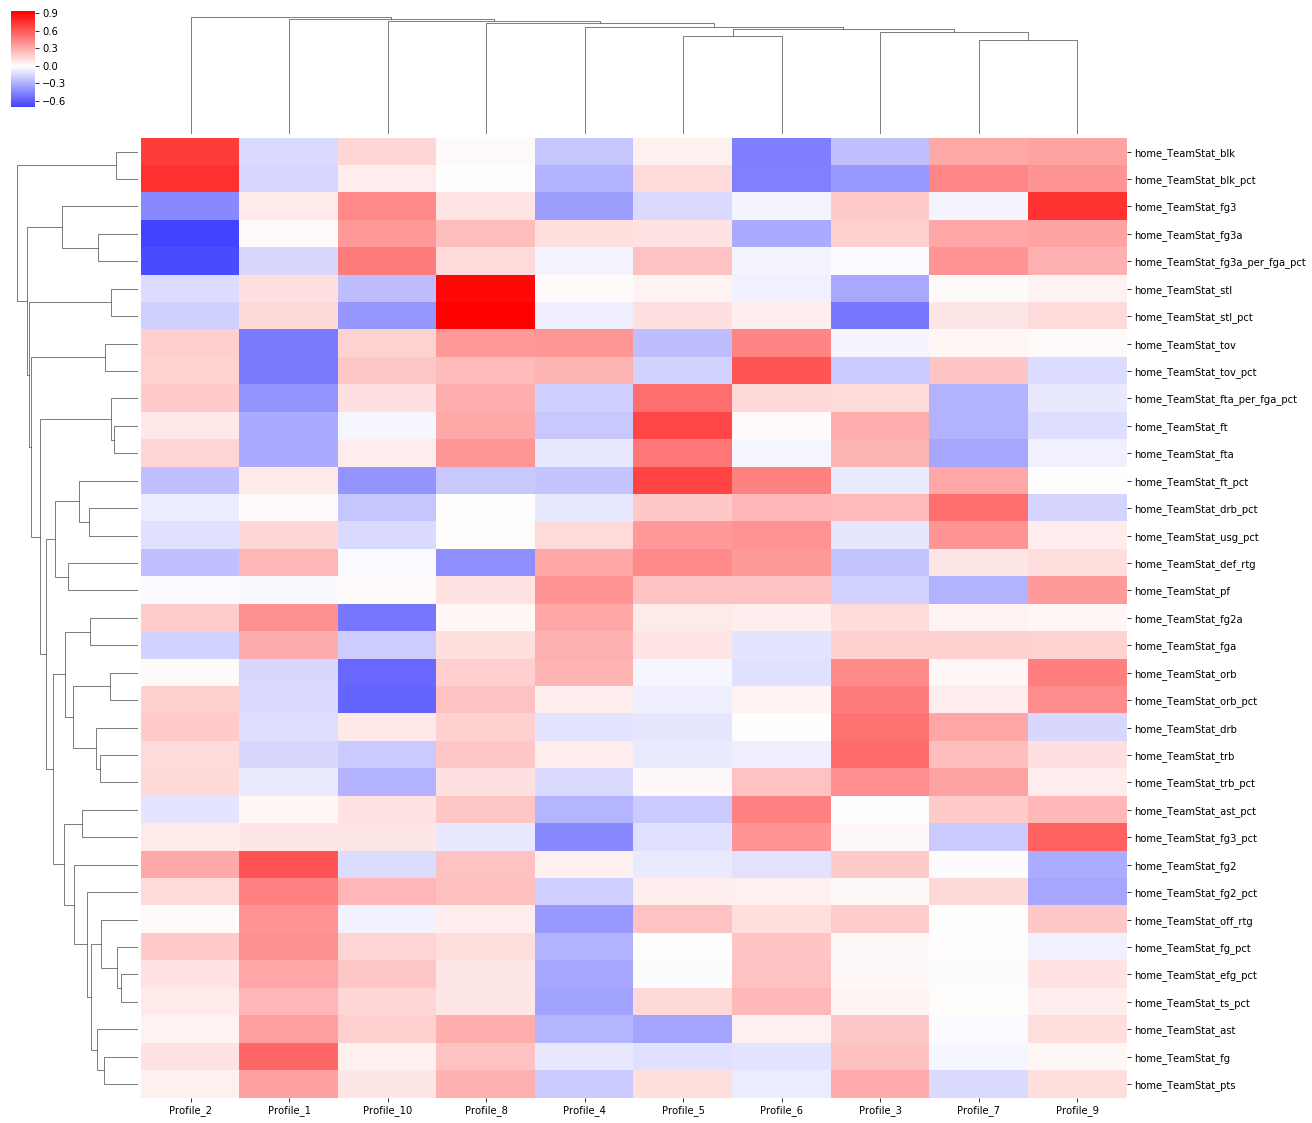

In [232]:
sns.clustermap(pd.DataFrame(ProfileEffect),center=0,cmap="bwr",figsize=(20,20))
plt.show()

In [227]:
pd.DataFrame(PlayerProfile).filter(regex="anthony.*davis")

,home_player_mp_anthony-davis-5
Profile_1,0.302589
Profile_2,0.074322
Profile_3,0.031439
Profile_4,0.065283
Profile_5,0.011863


In [228]:
pd.DataFrame(ProfileEffect).sort_values(by="Profile_1")

,Profile_1,Profile_2,Profile_3,Profile_4,Profile_5
home_TeamStat_fg2,-0.357094,0.506435,0.229011,0.237739,0.165352
home_TeamStat_fg2a,-0.279191,0.224357,0.526854,0.459042,-0.026864
home_TeamStat_fg,-0.051441,0.502149,-0.013904,0.260430,0.158164
home_TeamStat_ft,-0.036255,0.343193,0.140034,-0.285066,0.225730
home_TeamStat_orb_pct,-0.016296,0.375372,0.445940,0.230269,-0.309961
home_TeamStat_fg_pct,-0.015680,0.381483,-0.027150,-0.068885,0.493593
home_TeamStat_fta,0.004091,0.298574,0.201161,-0.281414,0.147765
home_TeamStat_fg2_pct,0.013235,0.357019,0.002006,-0.075936,0.474809
home_TeamStat_fta_per_fga_pct,0.030046,0.194780,0.180728,-0.448287,0.303619
home_TeamStat_orb,0.035760,0.221476,0.439247,0.387665,-0.505891
